In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read an Absenteeism dataset csv file and store our dataset into a dataframe called "df"
df = pd.read_excel("Absenteeism_at_work.xls")

df.insert(21,'Education Level',None)
df.insert(22,'Season',None)
df.insert(23,'Age Range',None)
df.insert(24,'LOS Range',None)

df.head()




,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Education Level,Season,Age Range,LOS Range
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,90,172,30,4,None,None,None,None
1,36,0,7,3,1,118,13,18,50,239554,...,0,0,98,178,31,0,None,None,None,None
2,3,23,7,4,1,179,51,18,38,239554,...,0,0,89,170,31,2,None,None,None,None
3,7,7,7,5,1,279,5,14,39,239554,...,1,0,68,168,24,4,None,None,None,None
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,90,172,30,2,None,None,None,None


In [57]:
df['Season'] = df['Seasons'].apply(lambda x: "Summer" if x == 1
                                              else "Fall" if x == 2
                                              else "Winter" if x == 3
                                              else "Spring")
df['Education Level'] = df['Education'].apply(lambda x: "High School" if x == 1
                                              else "Graduate" if x == 2
                                              else "Post Graduate" if x == 3
                                              else "Master and Doctor")
# Put the age into bins
bins = [25, 30, 35, 40, 45, 50, 55, 60]
group_names = ['(26-30)', '(31-35)', '(36-40)','(41-45)', '(46-50)', '(51-55)', '(56-60)']
df['Age Range'] = pd.cut(df['Age'], bins, labels = group_names)

# Put the LOS into bins
bins = [0, 5, 10, 15, 20, 25, 30, 35]
group_names = ['(0-5)', '(6-10)', '(11-15)','(16-20)', '(21-25)', '(26-30)', '(31-35)']
df['LOS Range'] = pd.cut(df['Service time'], bins, labels = group_names)

df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Education Level,Season,Age Range,LOS Range
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,90,172,30,4,High School,Summer,(31-35),(11-15)
1,36,0,7,3,1,118,13,18,50,239554,...,0,0,98,178,31,0,High School,Summer,(46-50),(16-20)
2,3,23,7,4,1,179,51,18,38,239554,...,0,0,89,170,31,2,High School,Summer,(36-40),(16-20)
3,7,7,7,5,1,279,5,14,39,239554,...,1,0,68,168,24,4,High School,Summer,(36-40),(11-15)
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,90,172,30,2,High School,Summer,(31-35),(11-15)


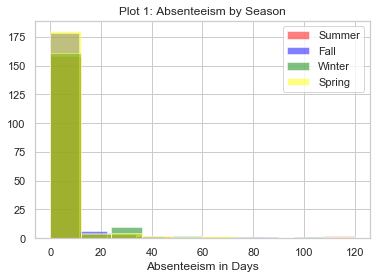

In [58]:
# Creating variables for each of the four conditions to graph using the basic
# matplotlib functionality.
#menlunchtip = tips.loc[(tips['sex']=='Male')&(tips['time']=='Lunch'),'tip']
summer = df.loc[(df['Season']=='Summer'),'Absenteeism time in hours']
fall =   df.loc[(df['Season']=='Fall'),'Absenteeism time in hours']
winter = df.loc[(df['Season']=='Winter'),'Absenteeism time in hours']
spring = df.loc[(df['Season']=='Spring'),'Absenteeism time in hours']

# Making overlapping histograms.
plt.hist(summer, color='red',  alpha=.5,label='Summer')  # alpha just controls the opacity
plt.hist(fall, color='blue', alpha=.5,label='Fall')
plt.hist(winter, color='green', alpha=.5,label='Winter')  
plt.hist(spring, color='yellow', alpha=.5,label='Spring')
plt.xlabel('Absenteeism in Days')
plt.legend(loc='upper right')
plt.title('Plot 1: Absenteeism by Season')
plt.show()

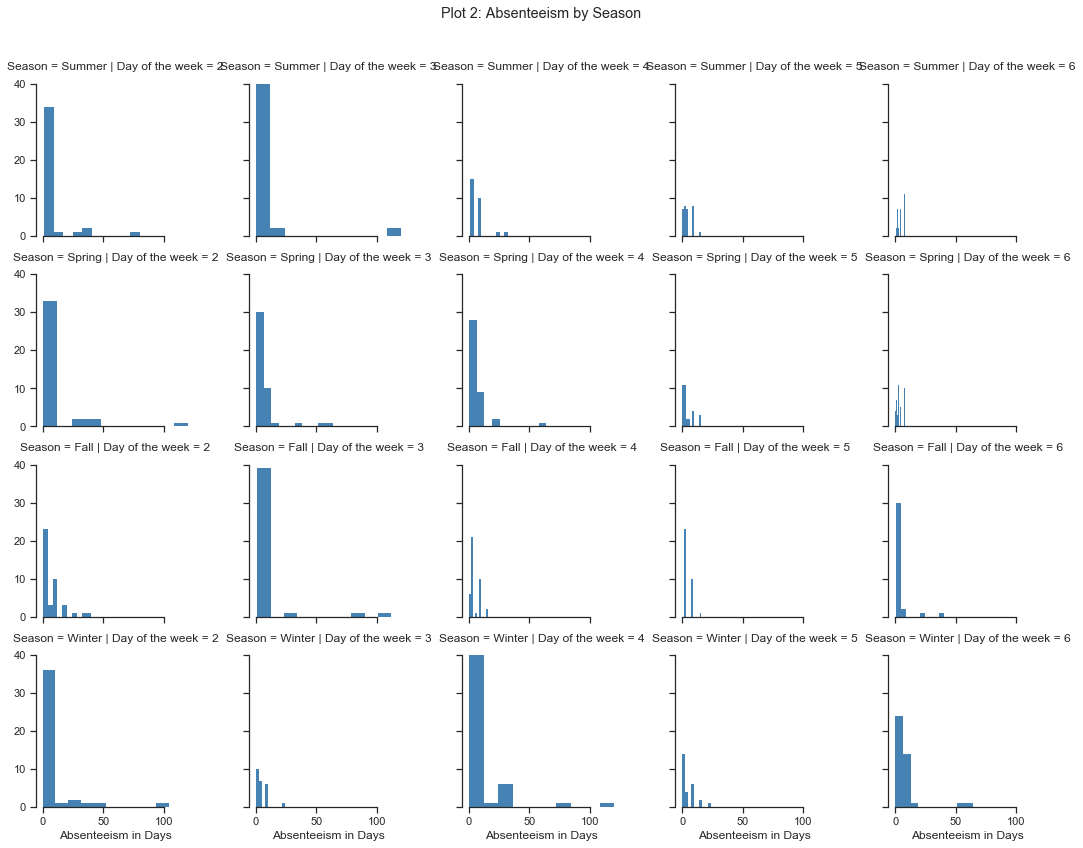

In [59]:
# Showing the  information in a seaborn facet grid.
sns.set(style="ticks")  #Setting the overall aesthetic

# Tell seaborn about the structure of our data.
g = sns.FacetGrid(df, row="Season", col="Day of the week")
# Name the plot type and the variable to be plotted using the structure.
g.map(plt.hist, "Absenteeism time in hours", color="steelblue",  lw=0)
# Moving the plots apart to make room for our titles.
plt.subplots_adjust(top=0.9)
# Making a more informative axis name.
g.set_axis_labels('Absenteeism in Days')
plt.suptitle('Plot 2: Absenteeism by Season')
# Removing excess lines around the plot.
sns.despine(trim=True)
plt.show()

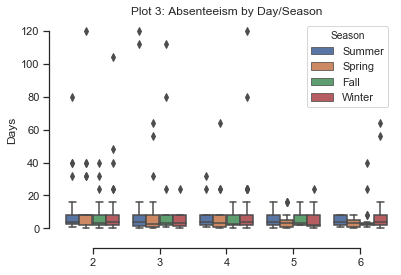

In [60]:
# Comparing groups using boxplots.
ax = sns.boxplot(x='Day of the week',y='Absenteeism time in hours',hue='Season',data=df)  
plt.title('Plot 3: Absenteeism by Day/Season')
sns.despine(offset=10, trim=True)
ax.set(xlabel='', ylabel='Days')

plt.show()

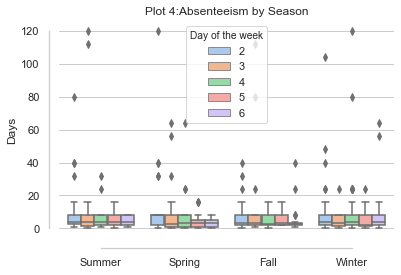

In [63]:
#Comparing groups again, but with a different emphasis.

# Setting the overall aesthetic.
sns.set(style="whitegrid")

ax = sns.boxplot(x='Season',y='Absenteeism time in hours',hue='Day of the week',data=df,palette='pastel')  

plt.title('Plot 4:Absenteeism by Season')

sns.despine(offset=10, trim=True)
ax.set(xlabel='', ylabel='Days')

plt.show()

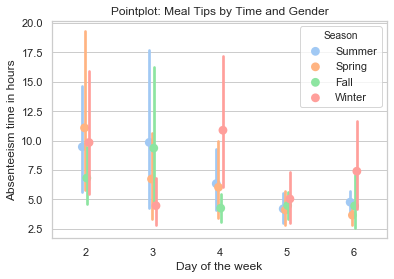

In [65]:
# Setting the overall aesthetic.
sns.set(style="whitegrid")
g = sns.pointplot(x="Day of the week", y="Absenteeism time in hours", hue="Season", data=df,
                   height=6, kind="strip", palette="pastel",ci=95,dodge=True,join=False)
plt.title('Pointplot: Meal Tips by Time and Gender')
plt.show()

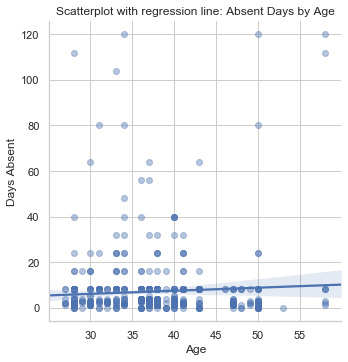

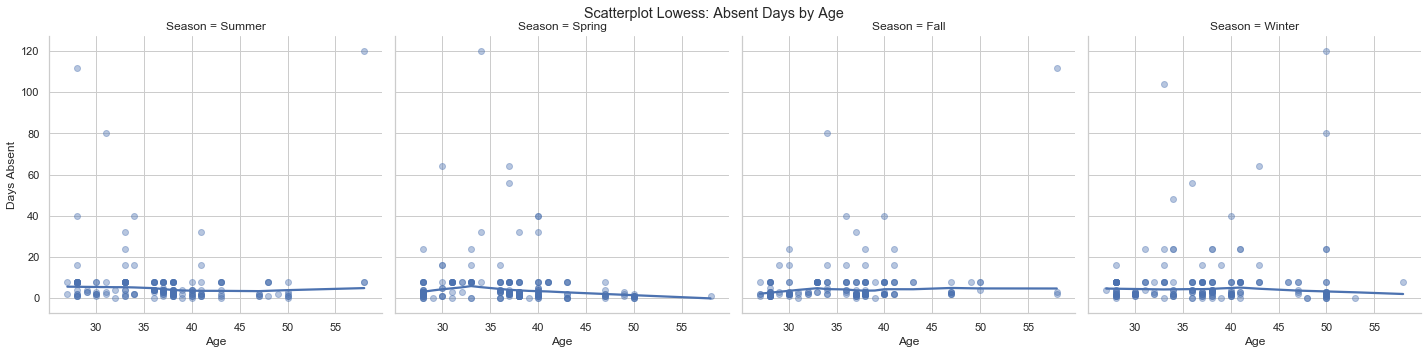

In [69]:
g = sns.lmplot(y='Absenteeism time in hours', 
               x='Age',
               data=df, # Data.
               fit_reg=True, # The regression line also includes a 95% confidence envelope.
               scatter_kws={'alpha':0.4})
g.set_ylabels("Days Absent")
g.set_xlabels("Age")
plt.title('Scatterplot with regression line: Absent Days by Age')
plt.show()

g = sns.lmplot(y='Absenteeism time in hours', 
               x='Age',
               data=df, # Data.
               col='Season',
               fit_reg=True, 
               ci=False,
               scatter_kws={'alpha':0.4}, 
               palette='pastel',
               lowess=True) # Using local weighing to fit a line.
g.set_ylabels("Days Absent")
g.set_xlabels("Age")
plt.suptitle('Scatterplot Lowess: Absent Days by Age')
plt.subplots_adjust(top=0.9)
plt.show()